<a href="https://colab.research.google.com/github/rarkis/Mundo1-Missao5/blob/main/Miss%C3%A3o_Pr%C3%A1tica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://logodownload.org/wp-content/uploads/2014/12/estacio-logo.png' width="300">  
Curso: Desenvolvimento Full Stack  - Turma: 22.3  
Polo Parque Eloy Chaves - Jundiaí-SP  
Disciplina: Colocando Tudo em Ordem e Guardando  
Alison Mendes - 202208906893  

# Missão Prática - Mundo 1, Nível 5
Implementação de um programa para manipular dados de um arquivo texto e visualizá-los em um histograma e nuvem de palavras.

## Objetivo da Prática
* Gerar dados de testes.  
* Gravar e recuperar dados de arquivos textos.  
* Manipular os dados para visualizá-los em um histograma.  
* Manipular os dados para visualizá-los em uma nuvem de palavras.  
* No final do projeto, o aluno vai ter implementado um programa para gerar dados com nomes de pessoas e respectivas pontuações, gravar em um arquivo, recuperar os dados do arquivo, visualizar os dados das pontuações das pessoas em um histograma e em uma nuvem de palavras.





## Geração de dados

In [31]:
!pip install Faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Definição do gerador de amostras.  
Pra gerar uma amostra/gráfico mais interessante, as notas podem ser decimais, e notas mais altas tem mais chance de serem incluídas na amostra.

In [32]:
def gerar_amostra(n_amostras = 1):
  from faker import Faker
  from random import randint,choices
  fake = Faker('pt_BR')
  texto = ''
  for _ in range(n_amostras):
    nome = fake.name()
    pnts = choices([i+1for i in range(100)], weights=[i+1 for i in range(100)],k=1)[0]/10
    # pnts = randint(1,10)
    texto += f'{nome},{pnts}\n'
  return texto  

## Gravação em arquivo

Definição da função que salva conteúdo em arquivo.
Foi utilizado o mode de escrita 'w' pra que fosse gerada sempre uma amostra completamente nova durante os testes.

In [33]:
def salvar_arquivo(filename,conteudo):
  with open(filename,'w') as file_obj:
    file_obj.write(conteudo)

Chamada da geração de 1000000 amostras e gravação dos dados no arquivo "amostra.txt"

In [34]:
salvar_arquivo('amostra.txt', str(gerar_amostra(10000)))

## Recuperação de dados de arquivo

Definição da função que recupera os nomes e pontuação do arquivo.  
A função foi implementada como um generator por que eu planejei ler o arquivo aos poucos, mas ao final não utilizei essa funcionalidade na implementação final.

In [35]:
def do_arquivo(filename='arquivo.txt'):
  try:
    with open(filename,'r') as file_obj:
      for linha in file_obj.readlines():
        nome,pts = linha.split(',')
        pts = float(pts.strip('\n'))
        yield {'nome':nome,'pontos':pts}
  except: raise Exception(f'arquivo {filename} não encontrado')

## Apresentação de dados em Histograma

### Definição das funções utilizadas no histograma

Definição da função que separa as pontuações dos dados de arquivo.  
Novamente, implementadas como generators com a intenção de fazer leitura gradual de volume arbitrário de dados.

In [36]:
# Arredonda o valor da pontuação
def round_pontos(filename='arquivo.txt'):
  for item in do_arquivo(filename):
    yield round( item['pontos'])
    
def pontos(filename='arquivo.txt'):
  for item in do_arquivo(filename):
    yield item['pontos']

Definição da função que gera o histograma

In [37]:
#gerar histograma
def gerar_hist(dados):
  import matplotlib.pyplot as plt
  n_pts=11
  plt.hist(dados, n_pts,density=True,facecolor='red')

  plt.xlabel('Pontuação')
  plt.ylabel('Incidência')
  plt.title('Histograma das pontuações')
  plt.grid(True)
  plt.show()

### Chamada do histograma com a lista de pontuação coletada
Na vizualização do histograma fica evidente a tendencia utilizada na geração dos dados

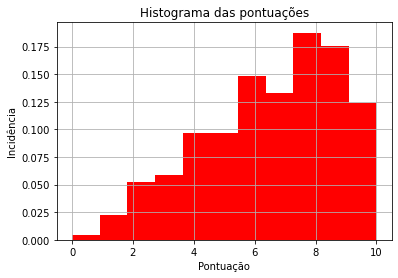

In [38]:
gerar_hist(list(round_pontos('amostra.txt')))

## Apresentação de dados em núvem de palavras

### Definições

In [39]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Retorna string equivalente a cada pontuação inteira possível

In [40]:
#retorna os numeros como texto
def num_extenso(numero):
  try:
    return {0:'ZERO', 1:'UM', 2:'DOIS', 3:'TRÊS', 4:'QUATRO', 5:'CINCO', 
            6:'SEIS', 7:'SETE', 8:'OITO', 9:'NOVE', 10:'DEZ'}[numero]
  except:
    #ignora numeros inválidos que porventura entrem no conjunto de dados
    return '' 

In [41]:
#converte e concatena os numeros em texto
def to_string(pontos):
  texto='' 
  for item in pontos:
    texto += f' {num_extenso(item)}'
  return texto
# print(to_string(round_pontos('amostra.txt')))

In [42]:
#gerar nuvem de palavras
def gerar_nuvem(texto):
  from wordcloud import WordCloud
  import matplotlib.pyplot as plt

  # nuvem_palavras = WordCloud(width=800,height=400).generate(texto)
  nuvem_palavras = WordCloud(background_color="rgba(255, 255, 255, 0)",
                             mode="RGBA", width=800,height=800).generate(texto)
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  # nuvem_palavras.to_file("Nuvem de palavras.png")
  plt.savefig("Nuvem de palavras.png",transparent = True)


### Chamada do gerador de núvem

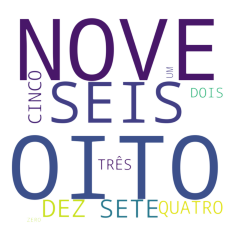

In [43]:
gerar_nuvem(str(to_string(round_pontos('amostra.txt'))))

## Conclusão
* A importancia de manipular arquivos de texto  

  A manipulação de arquivos de texto oferece um meio intermediário de se lidar com grande volume da dados e extrair dele tipos diferentes de informações que podem então ser manipuladas de maneiras diferentes, mas adequadas para cadaobjetivo  

* A importancia de visualizar os dados em um histograma  

  Histogramas oferencem uma maneira rápida de visualizar a distribuição de cada um dos valores em um conjuntos de dados númericos.  

* O que significa visualização por núvel de palavras.  
  Do mesmo modo, núvens de palavras oferecem uma maneira rápida de vizualizar as ocorrencias de cada palavra em um texto. 
